In [1]:
import numpy as np
import pandas as pd
import datetime
import time

In [2]:
# sample from Evan
start_time = time.time()
tripdata_dwn = pd.read_csv(
         '/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/Trip data/downsampled_rider.csv.gz',
         compression='gzip'
            )
print("--- %s seconds ---" % (time.time() - start_time))

/Users/bkuo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


--- 25.29970407485962 seconds ---


In [3]:
tripdata_dwn.head()

,Unnamed: 0,Unnamed: 0.1,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,...,stop_date,start_hour,stop_hour,start_min,stop_min,season,dayofweek,start_interval,stop_interval,Sample_num
0,0,0,1244,2017-09-01 00:04:57,2017-09-01 00:25:41,308,St James Pl & Oliver St,40.713079,-73.998512,2008,...,2017-09-01,0,0,0,0,fall,Friday,0:00,0:00,0
1,1,1,278,2017-09-01 00:11:00,2017-09-01 00:15:39,325,E 19 St & 3 Ave,40.736245,-73.984738,402,...,2017-09-01,0,0,0,0,fall,Friday,0:00,0:00,0
2,2,2,462,2017-09-01 00:13:58,2017-09-01 00:21:41,3244,University Pl & E 8 St,40.731437,-73.994903,3244,...,2017-09-01,0,0,0,0,fall,Friday,0:00,0:00,0
3,3,3,592,2017-09-01 00:21:19,2017-09-01 00:31:12,459,W 20 St & 11 Ave,40.746745,-74.007756,478,...,2017-09-01,0,0,20,20,fall,Friday,0:20,0:20,0
4,4,4,448,2017-09-01 00:26:24,2017-09-01 00:33:52,439,E 4 St & 2 Ave,40.726281,-73.989780,504,...,2017-09-01,0,0,20,20,fall,Friday,0:20,0:20,0


In [4]:
tripdata_dwn.dtypes

Unnamed: 0                   int64
Unnamed: 0.1                 int64
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
year                         int64
start_date                  object
stop_date                   object
start_hour                   int64
stop_hour                    int64
start_min                    int64
stop_min                     int64
season                      object
dayofweek                   object
start_interval              object
stop_interval               object
Sample_num          

In [5]:
tripdata_dwn.describe()

,Unnamed: 0,Unnamed: 0.1,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender,year,start_hour,stop_hour,start_min,stop_min,Sample_num
count,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06
mean,2.206946e+06,5.517366e+05,1.022802e+03,1.344681e+03,4.073726e+01,-7.398400e+01,1.336596e+03,4.073691e+01,-7.398413e+01,2.575756e+04,1.129663e+00,2.017303e+03,1.398134e+01,1.414437e+01,2.002888e+01,2.002888e+01,1.500463e+00
std,1.274182e+06,3.185460e+05,1.252944e+04,1.379811e+03,3.488782e-02,3.988998e-02,1.377453e+03,4.834968e-02,7.289720e-02,8.356412e+03,5.660779e-01,2.066602e+00,4.831633e+00,4.884730e+00,1.635598e+01,1.635598e+01,1.117876e+00
min,0.000000e+00,0.000000e+00,6.000000e+01,7.200000e+01,0.000000e+00,-7.403423e+01,7.200000e+01,0.000000e+00,-7.406860e+01,1.452900e+04,0.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.103473e+06,2.758680e+05,3.820000e+02,3.550000e+02,4.071894e+01,-7.399692e+01,3.530000e+02,4.071882e+01,-7.399712e+01,1.853700e+04,1.000000e+00,2.016000e+03,1.000000e+01,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.206946e+06,5.517360e+05,6.440000e+02,4.830000e+02,4.073782e+01,-7.398717e+01,4.820000e+02,4.073705e+01,-7.398752e+01,2.492300e+04,1.000000e+00,2.018000e+03,1.500000e+01,1.500000e+01,2.000000e+01,2.000000e+01,2.000000e+00
75%,3.310420e+06,8.276048e+05,1.122000e+03,3.141000e+03,4.075527e+01,-7.397536e+01,3.141000e+03,4.075514e+01,-7.397574e+01,3.155300e+04,1.000000e+00,2.019000e+03,1.800000e+01,1.800000e+01,4.000000e+01,4.000000e+01,3.000000e+00
max,4.413893e+06,1.104568e+06,8.863767e+06,4.249000e+03,4.550626e+01,0.000000e+00,4.249000e+03,4.550626e+01,0.000000e+00,4.990100e+04,2.000000e+00,2.020000e+03,2.300000e+01,2.300000e+01,4.000000e+01,4.000000e+01,3.000000e+00


In [6]:
# copy from original data and clean
tripdata = tripdata_dwn.copy()
tripdata = tripdata[tripdata['start station name'].str.contains("temporarily removed") == False]
tripdata = tripdata[tripdata['start station name'] != 0]

In [7]:
# prep input data
hier_input = tripdata[['start station name', 'starttime', 'start_hour', 'tripduration']]
hier_input['starttime'] = pd.to_datetime(hier_input.starttime)
hier_input['month'] = hier_input['starttime'].dt.month
hier_input['start station name'].unique().shape
hier_input = hier_input.pivot_table(values='tripduration', 
                                    index=['start station name'], 
                                    columns='start_hour', 
                                    aggfunc=np.sum).fillna(0)


/Users/bkuo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bkuo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [103]:
# model fitting hierarical
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()
hier.set_params(n_clusters=4, affinity = 'cosine', linkage = 'complete')
hier.fit(hier_input)

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=4)

In [104]:
import sys
# np.set_printoptions(threshold=sys.maxsize) # displys all elements of the numpy array
np.set_printoptions(threshold = False) # displays normal sized array

In [105]:
hier.labels_

array([0, 1, 1, ..., 2, 1, 1])

In [106]:
# adding back coordination
coor = tripdata[['start station name', 'start station latitude', 'start station longitude']].groupby('start station name').mean()

station_plt = pd.merge(hier_input, coor, 
                       left_on = 'start station name', 
                       right_on = 'start station name',
                       how = 'left')

In [107]:
# plotting clusters
import plotly.express as px
import plotly.graph_objects as go
px.set_mapbox_access_token(open('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/EDA/mapbox_token.txt').read())

station_plt['cluster'] = hier.labels_
station_plt

df = station_plt
neighborhood = px.scatter_mapbox(station_plt, 
                                 lat='start station latitude', 
                                 lon='start station longitude', 
                                 color="cluster",
#                                  color_continuous_scale=px.colors.sequential.Rainbow,
                                 size_max=15, 
                                 zoom=10,
                                 hover_name= station_plt.index,
                                 title = 'Hierarical Clustering')

neighborhood.show()

In [70]:
# k-means data prep

# demean to centralize row-wise using prepped df from heirarchical clustering
# kmean_input = hier_input.sub(hier_input.mean(axis=1), axis=0)
kmean_input = hier_input.apply(lambda t: (t - t.mean())/t.std())

In [95]:
# model fitting kmeans

from sklearn.cluster import KMeans
kmeans = KMeans()

kmeans.set_params(n_clusters = 5)
kmeans.fit(kmean_input)

KMeans(n_clusters=5)

In [96]:
kmeans.cluster_centers_

array([[-0.18977904, -0.13263924, -0.23540439, ..., -0.34654178,
        -0.30032573, -0.3203228 ],
       [ 0.87246977,  0.57613714,  1.20151985, ...,  2.62170619,
         2.1674756 ,  1.71720393],
       [ 0.28331758,  0.15898502,  0.15719337, ...,  0.28945874,
         0.28182891,  0.31255509],
       [ 0.71286729,  0.57664218,  1.23472137, ...,  1.60092508,
         1.34087305,  1.48426003],
       [ 0.05774633, -0.0987891 , -0.08999691, ...,  0.03873185,
         0.24376347, -0.04025713]])

In [97]:
kmeans.labels_

array([0, 2, 3, ..., 2, 2, 0], dtype=int32)

In [98]:
# adding back coordination
station_plt = pd.merge(kmean_input, coor, 
                       left_on = 'start station name', 
                       right_on = 'start station name',
                       how = 'left')

In [99]:
# plotting clusters
import plotly.express as px
import plotly.graph_objects as go
px.set_mapbox_access_token(open('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/EDA/mapbox_token.txt').read())

station_plt['cluster'] = kmeans.labels_

df = station_plt
neighborhood = px.scatter_mapbox(station_plt, 
                                 lat='start station latitude', 
                                 lon='start station longitude', 
                                 color="cluster",
#                                  color_continuous_scale=px.colors.sequential.Rainbow,
                                 size_max=15, 
                                 zoom=10,
                                 hover_name= station_plt.index,
                                 title = 'K-means Clustering')

neighborhood.show()

In [100]:
import scikitplot.plotters as skplt 
# import plot_elbow_curve, plot_silhouette

/Users/bkuo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_elbow_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.cluster.plot_elbow_curve instead.



<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

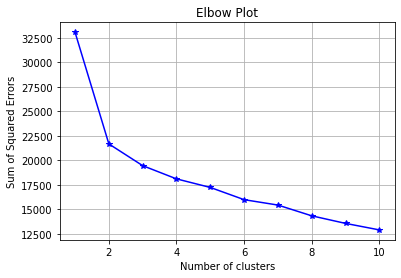

In [101]:
# plot_inertia(kmeans, x, range(1, 10))
skplt.plot_elbow_curve(kmeans, kmean_input, cluster_ranges=range(1, 11))


/Users/bkuo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_silhouette is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_silhouette instead.



<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

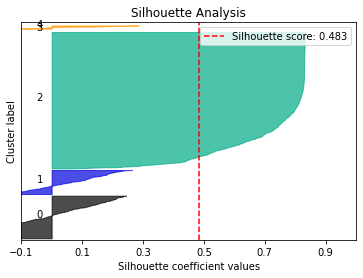

In [102]:
# plot_silhouette(kmeans, x)
skplt.plot_silhouette(kmeans, kmean_input)
# plt.show()